# Fandango Ratings Inflation - 1 year later

Fandango Media, LLC sells movie tickets. In addition to a movie synopsis they also provide a movie rating (on a scale of 1 to 5) that is supposedly an aggregate of user ratings. 
In 2015, Walt Hickey discovered that Fandango had been [inflating its movie ratings](https://fivethirtyeight.com/features/fandango-movies-ratings/). Their ratings were consistently higher than the ratings on other reviews aggregator sites. Additionally, Hickey found that they were rounding up user ratings by as much as 1 star. From the HTML backend of the page, Hickey discovered that the Fandango system never rounded down ratings. Fandango attributed this to a rounding error in its website code and asserted that the error was not present on its app. While it turned out to be true that the app did not round up the ratings all the time, Fandango ratings on the app still skewed high when compared to other movie review aggregators. 

Thus in this project, we seek to ascertain whether Fandango ratings still skew high. The raw ratings data is no longer available on the Fandango site HTML; however, the general trend of the Fandango ratings will be compared to determine whether Fandango has truly stopped its ratings' inflation. 

This project will focus in particular on the ratings of the most popular movies 1 years later, where they may have perhaps more incentive to inflate the ratings, to encourage even more ticket sales.

|Column Name|Details|
|:--:|:-----:|
|RottenTomatoes|The Rotten Tomatoes Tomatometer score for the film|
|RottenTomatoes_User|The Rotten Tomatoes user score for the film|
|Metacritic|The Metacritic critic score for the film|
|Metacritic_User|The Metacritic user score for the film|
|IMDB|The IMDb user score for the film|

## Data Exploration and Cleaning

In [1]:
#import relevant modules and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style
import seaborn as sns

#read relevant data
initial_ratings = pd.read_csv('fandango_score_comparison.csv')
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
#display initial ratings 
initial_ratings

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [3]:
#display 2016 and 2017 ratings
ratings_16_17

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,1.05,1.5,2.5,1.0,1.0


The columns that directs reference Fandango ratings will be isolated in order to make further analysis easier.

In [4]:
#isolate findango ratings
fandango_initial = initial_ratings.loc[:, ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_1617 = ratings_16_17.loc[:, ['movie', 'year', 'fandango']].copy()

In [5]:
fandango_1617

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


The intial dataset consisted of all movies that have a rotten tomatoes rating, a RT User rating, a Metacritic score, a Metcritic user score and and IMDb score as well as at least 30 fan reviews on fandango[1](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md). However the second dataset consists only of the most popular movies released on 2016 and in 2017 (before March 2017). This means that while we can draw general conclusions about Fandango's ratings inflation for the most popular movies, the observed trends may not hold true for all Fandango movies.

Although the second data set states that it consists of only the most popular movies, no metric is given for the determination of popularity. However, since Fandango no longer reports user ratings it will be difficult to crosscheck the number of users for each rating. Therefore, the term popular will be taken as is.

### Isolate relevant movies

In the first dataset movies that were released in 2015 will be isolated; in the second data set the same will be done for movies that were released in 2016.

In [6]:
#create new column in fandango_initial for the year
pattern = r'\(([0-9]+)\)'
fandango_initial['year'] = fandango_initial['FILM'].str.extract(pattern).astype('int')
#isolate 2015 movies
fandango_15 = fandango_initial.loc[fandango_initial['year'] == 2015]

#isolate 2016 movies in fandango_1617
fandango_16 = fandango_1617.loc[fandango_1617['year'] == 2016]

In [7]:
fandango_16

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


## Comparing Fandango 2015 and 2016 Ratings Distributions

At first, frequency distribution plots will be generated in order to make a simple analysis of the distributions of Fandango movie ratings in 2015 and 2016.

In [8]:
%matplotlib inline

In [9]:
def freq_table(series):
    '''This function takes in a series of movie ratings on a 1-5 scale and 
    returns a percentage normalized frequency table of intervals that are 0.5 apart e.g (0 - 0.5].
    Note: this function works in this particular context because all the values have been rounded to the nearest 0.5, 
    if that was not the case, you would need to round them yourself'''
   
    #set intervals that are 0.5 apart starting from 0 and ending at 5. The intervals are right inclusive.
    intervals = pd.interval_range(start = -0.5, end = 5, freq = 0.5)
    inter_freq_table = pd.Series(np.zeros(len(intervals)), index = [interval.right for interval in intervals]).astype(int)

    #loop through the series and update the interval frequency table, adding each value to the interval to which it belongs
    for val in series:
        for interval in intervals:
            if val in interval:
                inter_freq_table.loc[interval.right] += 1
                break
                
    #normalize the interval frequency table
    x = inter_freq_table.sum()
    inter_freq_table /= x
    inter_freq_table *= 100
    
    return inter_freq_table
                

In [10]:
def plot_aesthetics(freq_plot, colors, area_colors, sig_bar_line, title, subtitle, labels, labels_pos, sig_bar_text, x_limits = (-0.1, 5.5), y_limits = (-1,41), y_ticks = [0,10,20,30,40], y_ticklabels = ['0   ', '10   ', '20   ', '30   ', '40%'],
                    x_ticks = [0, 1, 2, 3, 4, 5], x_ticklabels = ['✰', '★', '★★', '★★★', '★★★★', '★★★★★'], sig_bar_line_pos = (-0.5, -5),
                    sig_bar_text_pos = (-0.425, -7), title_pos = (-0.425, 46), subtitle_pos = (-0.425, 42)):
                    
    '''This function takes in:
        freq_plot:        A matplotlib graph
        colors:           Nested list of RGB values of relevant colors
        area_colors:      Nested list of RGB values of colors under each curve
        sig_bar_line:     The string of underscores which will create the signature bar line
        title:            Title of graph as string
        subtitle:         Subtitle of graph as string. Since this is likely to be long, remember to break it up accordingly
        labels:           Labels of the different lines
        labels_pos:       Positions of the labels
        sig_bar_text:     Text in the signature bar line 
        x_limits:         Limits of the x axis. Default is (-0.1, 5.5)
        y_limits:         Limits of the y axis. Default is (-1, 41)
        y_ticks:          List of y tick positions. Default is [0,10,20,30,40]
        y_ticklabels:     List of yticklabels. Default is ['0   ', '10   ', '20   ', '30   ', '40%']
        x_ticks:          List of x tick positions. Default is [0,1,2,3,4]
        x_ticklabels:     List of xticklabels. Default is ['✰', '★', '★★', '★★★', '★★★★', '★★★★★']
        sig_bar_line_pos: The position of the signature bar line. Default is (-0.5, -5)
        sig_bar_text_pos: The position of the signature bar text. Default is (-4.25, -7)
        title_pos:        Position of title. Default is (-0.425, 46) 
        subtitle_pos:     Position of subtitle. Default is (-0.425, 42)
        
        
        The function then returns a graph in the fivethirtyeight style.
        '''

   
    #make tick labels bigger
    freq_plot.tick_params(axis = 'both', which = 'major', labelsize = 18)

    #add vertical and horizontal lines
    freq_plot.axhline(y = 0, color = 'black', linewidth = 2.5, alpha = 0.7)
    freq_plot.set_xlim(x_limits[0], x_limits[1])
    freq_plot.set_ylim(y_limits[0], y_limits[1])

    #set ticklabels
    freq_plot.set_yticks(y_ticks)
    freq_plot.set_yticklabels(y_ticklabels)
    freq_plot.set_xticks(x_ticks)
    freq_plot.set_xticklabels(x_ticklabels)

    #add a signature bar
    freq_plot.text(x = sig_bar_line_pos[0], y = sig_bar_line_pos[1],
                  s = sig_bar_line, 
                  color = 'grey', alpha = 0.7)
    freq_plot.text(x = sig_bar_text_pos[0], y = sig_bar_text_pos[1],
                  s = sig_bar_text, 
                  color = 'grey', alpha = 0.7)

    #add a title and subtitle
    freq_plot.text(x = title_pos[0], y = title_pos[1], s = title, fontsize = 26, weight = 'bold', alpha = 0.75)
    freq_plot.text(x = subtitle_pos[0], y = subtitle_pos[1], s = subtitle, fontsize = 19, alpha = 0.85)

    #add coloured labels
    for i in range(len(labels)):
        freq_plot.text(x = labels_pos[i][0], y = labels_pos[i][1], s = labels[i], color = colors[i], weight = 'bold', backgroundcolor = '#f0f0f0')

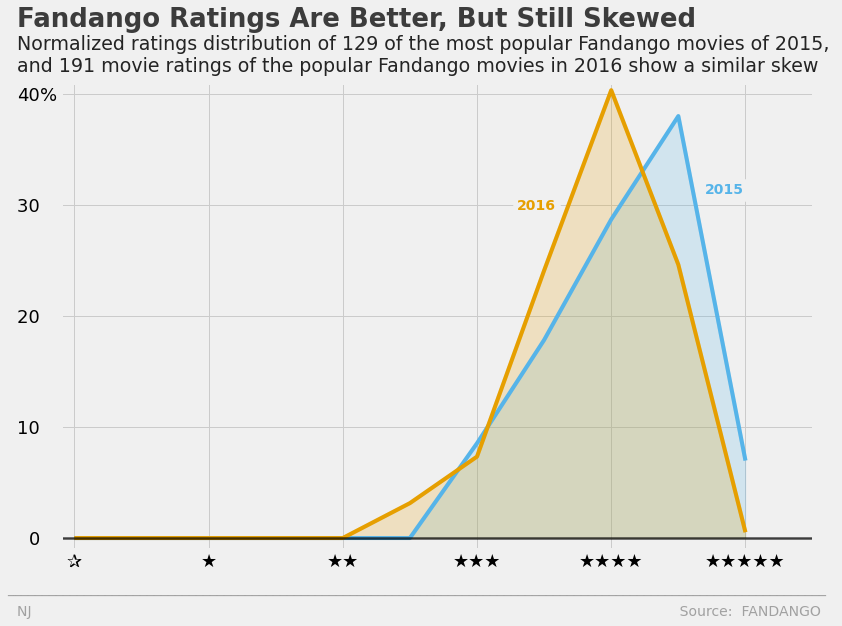

In [11]:
#create frequency tables
fandango_15_norm = freq_table(fandango_15['Fandango_Stars'])
fandango_16_norm = freq_table(fandango_16['fandango'])

freq_tables = [fandango_15_norm, fandango_16_norm]
colors = [(86/255, 180/255, 233/255), (230/255, 159/255, 0/255)]
area_colors = [(86/255, 180/255, 233/255), (230/255, 159/255, 0/255)]

#plot the normalised frequency distribution graphs for fandango's 2015 and 2016 ratings
style.use('fivethirtyeight')
fig,freq_plots = plt.subplots(figsize = (12,8))

for i in range(len(freq_tables)): 
    freq_plots = freq_tables[i].plot(color = colors[i])
    freq_plots = freq_tables[i].plot(kind = 'area', alpha = 0.2, color = area_colors[i])
    
sig_bar_line = '_____________________________________________________________________________________________________________________'
title = 'Fandango Ratings Are Better, But Still Skewed'
subtitle = '''Normalized ratings distribution of 129 of the most popular Fandango movies of 2015, 
and 191 movie ratings of the popular Fandango movies in 2016 show a similar skew'''
labels = ['2015', '2016']
labels_pos = [(4.7, 31), (3.3, 29.5)]
sig_bar_text = 'NJ                                                                                                                                                Source:  FANDANGO'

plot_aesthetics(freq_plots, colors, colors, sig_bar_line, title, subtitle, labels, labels_pos, sig_bar_text)

We can see from the graph above that while fandango ratings have shifted a bit more to the left, their ratings are still skewed. There are fewer 5 star ratings in 2016, than there were in 2015. In both years, there are no ratings less than or equivalent to  2 stars. However, in 2016, there are ratings less than 2.5, but in 2015, no such ratings existed. Additionally, over 89% of the ratings in both years are greater than 3.5 stars. The peak of the 2016 ratings are a bit more to the left (the peak is around 4 stars); while in 2015, the peak was around 4.5 stars. This change is mitgated by the fact that the peak in 2016 is higher than that of 2015. While some changes seem to indicate a slight shift in the skewed ratings of Fandango's popular movies, the bias towards higher ratings still existed. Suggesting that not much has changed with Fandango's rating system. To make a definitive statement however, we will compute the mean, mode and median for each year's distribution.

## Comparing Summary Statistics

In [12]:
#calculate mean, mode, median for each year
stats_15 = pd.Series({'mean_15': fandango_15['Fandango_Stars'].mean(), 'median_15': fandango_15['Fandango_Stars'].median(), 'mode_15': fandango_15['Fandango_Stars'][1:].mode()[0]})
stats_16 = pd.Series({'mean_16': fandango_16['fandango'].mean(), 'median_16': fandango_16['fandango'].median(), 'mode_16': fandango_16['fandango'].mode()[0]})

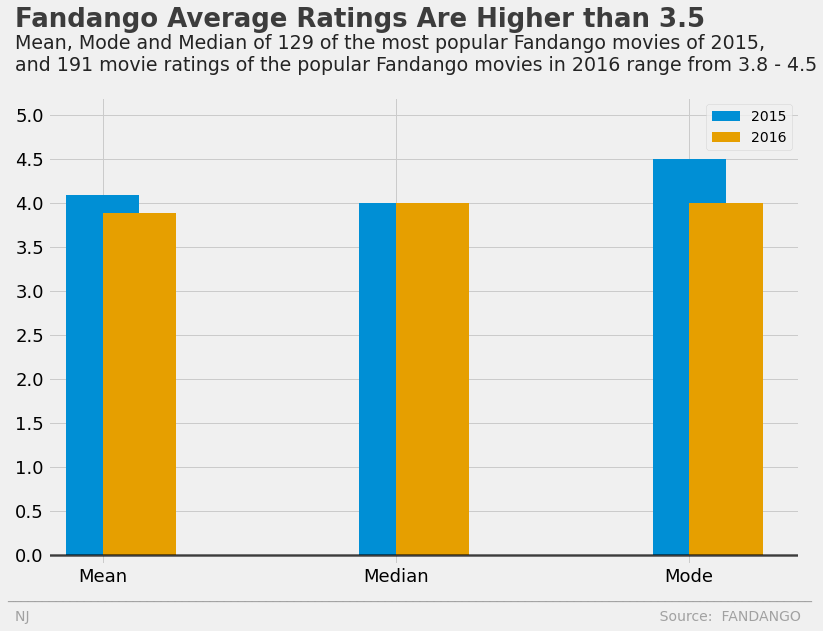

In [13]:
#plot bar chart
fig, avg_plot = plt.subplots(figsize = (12,8))
bar_pos = np.arange(3)*4
colors = [(86/255, 180/255, 233/255), (230/255, 159/255, 0/255)]
area_colors = [(86/255, 180/255, 233/255), (230/255, 159/255, 0/255)]
avg_plot.bar(bar_pos+0, stats_15, width = 1)
avg_plot.bar(bar_pos+0.5, stats_16, width = 1, color = (230/255, 159/255, 0/255))

#show legend
avg_plot.legend(['2015', '2016'], loc = 'upper right')

#set parameters for plot aesthetics
sig_bar_line = '___________________________________________________________________________________________________________________'
title = 'Fandango Average Ratings Are Higher than 3.5'
subtitle = '''Mean, Mode and Median of 129 of the most popular Fandango movies of 2015, 
and 191 movie ratings of the popular Fandango movies in 2016 range from 3.8 - 4.5'''
labels = ['', '']
labels_pos = [(4.7, 31), (3.3, 29.5)]
sig_bar_text = 'NJ                                                                                                                                            Source:  FANDANGO'

#change plot aesthetics to fivethirtyeight style
plot_aesthetics(avg_plot, colors, area_colors, sig_bar_line, title, subtitle, labels, labels_pos, sig_bar_text, x_limits = (-0.75, 9.5), y_limits = (-0.1,5.2), y_ticks = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], y_ticklabels = ['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0'],
                    x_ticks = [0, 4, 8], x_ticklabels = ['Mean', 'Median', 'Mode'], sig_bar_line_pos = (-1.3, -0.5),
                    sig_bar_text_pos = (-1.2, -0.75), title_pos = (-1.2, 6), subtitle_pos = (-1.2, 5.5))

Looking at the mean, median and mode of both years, the same trend from the previous sections continues. The 2016 values are generally lower than the 2015 values. For example, the mean is ~0.2 lower in 2016 and the median is 0.5 lower while the mode stays the same. However, despite lower values in 2016. The values are generally higher than you would expect. This point will perhaps be made clearer if the Fandango 2016 statistics are compared to statistics from different movie review sites, which is what we will be doing in the next section.

## Comparing Fandango 2016 Ratings to Other Movie Ratings Sites

In [14]:
#isolate movies released in 2016 and normalised scores
relevant_cols = ['fandango', 'nr_metascore', 'nr_imdb', 'nr_tmeter', 'nr_audience']
ratings_16 = ratings_16_17.loc[ratings_16_17['year'] == 2016]

#create a frequency table for each col
freq_table_dict = {}
for col in relevant_cols:
    freq_table_dict[col] = freq_table(ratings_16[col])

In [15]:
freq_table_dict

{'fandango': 0.0     0.000000
 0.5     0.000000
 1.0     0.000000
 1.5     0.000000
 2.0     0.000000
 2.5     3.141361
 3.0     7.329843
 3.5    24.083770
 4.0    40.314136
 4.5    24.607330
 5.0     0.523560
 dtype: float64,
 'nr_metascore': 0.0     0.000000
 0.5     1.047120
 1.0     4.712042
 1.5     9.947644
 2.0    18.324607
 2.5    17.277487
 3.0    20.942408
 3.5    14.659686
 4.0     9.947644
 4.5     2.094241
 5.0     1.047120
 dtype: float64,
 'nr_imdb': 0.0     0.000000
 0.5     0.000000
 1.0     0.000000
 1.5     0.000000
 2.0     3.664921
 2.5    11.518325
 3.0    37.172775
 3.5    31.937173
 4.0    15.706806
 4.5     0.000000
 5.0     0.000000
 dtype: float64,
 'nr_tmeter': 0.0     4.188482
 0.5     6.806283
 1.0    10.994764
 1.5     8.900524
 2.0    12.041885
 2.5     5.235602
 3.0     8.376963
 3.5     9.424084
 4.0    13.612565
 4.5    13.612565
 5.0     6.806283
 dtype: float64,
 'nr_audience': 0.0     0.000000
 0.5     1.047120
 1.0     7.329843
 1.5     6.806283
 

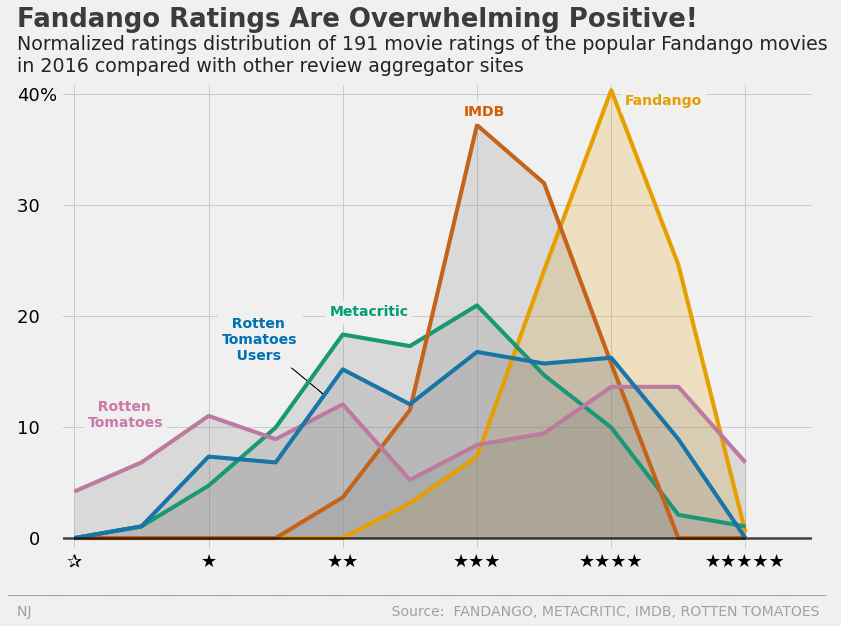

In [16]:
colors = [(230/255, 159/255, 0/255), (0/255, 158/255, 115/255), (213/255, 92/255, 0/255), (204/255, 121/255, 167/255), (0/255, 114/255, 178/255)]
area_colors = [(230/255, 159/255, 0/255), (128/255, 128/255, 128/255), (128/255, 128/255, 128/255), (128/255, 128/255, 128/255), (128/255, 128/255, 128/255)]
i = 0

#plot the normalised frequency distribution graphs for fandango's 2015 and 2016 ratings
fig,freq_plots = plt.subplots(figsize = (12,8))

for freq_table in freq_table_dict: 
    freq_plots = freq_table_dict[freq_table].plot(color = colors[i])
    freq_plots = freq_table_dict[freq_table].plot(kind = 'area', alpha = 0.2, color = area_colors[i])
    i += 1
    
sig_bar_line = '_____________________________________________________________________________________________________________________'
title = 'Fandango Ratings Are Overwhelming Positive!'
subtitle = '''Normalized ratings distribution of 191 movie ratings of the popular Fandango movies 
in 2016 compared with other review aggregator sites'''
labels = ['Fandango', 'Metacritic', 'IMDB', '  Rotten \nTomatoes', '  Rotten\nTomatoes\n   Users']
labels_pos = [(4.1, 39), (1.9, 20), (2.9,38), (0.1,10), (1.1,16)]
sig_bar_text = 'NJ                                                                                Source:  FANDANGO, METACRITIC, IMDB, ROTTEN TOMATOES'
freq_plots.arrow(x=1.55, y=16, dx=0.3, dy=-3, width=0.005, fc='k', ec='k')

plot_aesthetics(freq_plots, colors, area_colors, sig_bar_line, title, subtitle, labels, labels_pos, sig_bar_text)

Fandango's ratings are overwhelmingly positive when compared to the ratings of other review aggregators.
* *Fandango's* ratings begin at 2.5, while those of *IMDB* (the next highest) begins at 2
* Similarly, the rating the peak of *Fandango's* distribution is 4 stars, while the peak of *IMDB's* is 3 stars, only 0.5 from the mid range value

However, it can also be observed that the sites which have user ratings generally have higher ratings than the critics rated sites. In general the ratings for the critic sites such as *Rotten Tomatoes* and *Metacritic*, are more evenly distributed than those of fan sites such as *Fandango* and *IMDB*. The most popular *Rotten Tomatoes* ratings are 4.0 and 4.5. However, they each contribute to only 13.61% of the ratings given on the site. This is likely because critics are more likely to trash a movie than fans are; as critics oftentimes have higher standards for what makes a movie. The exception to this trend however, is the *Rotten Tomatoes Users* site, which still has a fairly even distribution across most ratings and unlike IMDB and Fandango does not have any particularly popular ratings. This may be in part because *Rotten Tomatoes* may be a site that attracts more critic-like viewers; or perhaps seeing the criticis reviews influences the user reviews. It's hard to tell

In context of *Fandango's* place as a user ratings site, although it's ratings distribution is definitely skewed, when compared to *IMDB* this skew is not as marked as it is when compared to critic sites like Metacritic and Rotten Tomatoes

# Conclusion

* Fandango's 2016 ratings are a bit less skewed than they were in 2015.
* Fandango's ratings are still a lot more positive than those of their counterparts
* Fandango may still be tampering with ratings